# **CARDIOVASCULAR DISEASE PREDICTION**

 My task will be to to create a machine learning model that helps indentify individuals who are prone to cadiovascular diseases.

# **BENEFIT FOR ORGANIZATION**

Being able to predict proness cardio  vascular disease is important to hospitals and their clients in that it helps prevent premature death and diasbilities that caused by these diseases if intervention is done early enough. this would result in an ovrall increase in health and would help people save on money they would have spent on medical procedures that help treat such diseases. Lastly this can help the company can a competitive advantage in the healthcare industry.

# **MACHINE LEARNING MACHINE LEARNING PROBLEM**


My task will be to be able to predict whether an individual is at risk of developing cardiovascular diseases base on a number of factors.My predictions will be done between two classes so my output will be binary with 1 representating prone to vascular diseases and 0 not prone to vascular disease.To achieve by training four different models on the dataset and picking the model that performs best.

# **DATA COLLECTIONS**


To create this model we need to obtain medical information: family history of cardiovascular disease, smoking history,cholestrol levels,blood pressure,glucose levels.
demographic of people: Gender,Age,race/ethnicity,education level,income level.
information about their lifestyle factors such as :Physical activity levels,diet,stress levels.
To achieve this
I used secondary data from the Cardiovascular-disease-dataset

# **DATASET** https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset




**LIBRARIES**

I imported python libraries that i will use in my machine learning task here.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

# **DATA EXPLORATION**

I first loaded the dataset using pandas,and displayed the first 5 entries to look at the format of the dataset.


In [ ]:
data = pd.read_csv("/content/cardio_train.csv",sep=";")
data = data.set_index('id')
data.head()#displays first five rows of dataset

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**CHECKING FOR IMBALACE**

I checked for imbalance between the two labels.An imbalance in the dataset which would mean a difference of more than 1% difference in the total count of each of the two labels.

The imbalance ratio is 0.9988
Percentage of the positive class: 49.9700%
Percentage of the negative class: 50.0300%


<Axes: xlabel='None'>

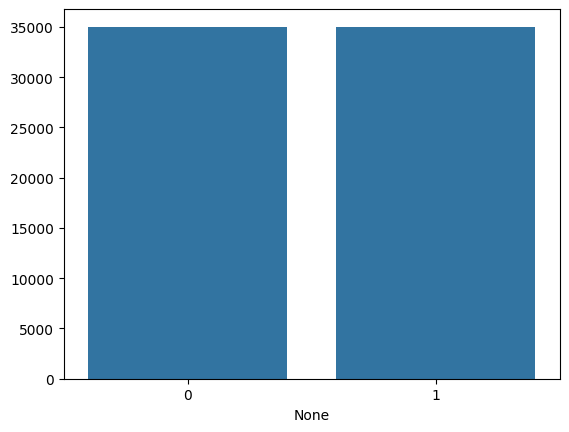

In [ ]:
#a count of each individual label
n_positive = len(data[data['cardio'] == 1])
n_negative = len(data[data['cardio'] == 0])

# calculating the ratio of the positive label to teh negative.
imbalance_ratio = n_positive / n_negative

print(f"The imbalance ratio is {imbalance_ratio:.4f}")

# Calculating the percentage of the positive lable
positive_percentage = 100 * round(n_positive / (n_positive + n_negative), 4)
print(f"Percentage of the positive class: {positive_percentage:.4f}%")
#calculating the percentage of the negative label
negative_percentage = 100 * round(n_negative / (n_positive + n_negative), 4)
print(f"Percentage of the negative class: {negative_percentage:.4f}%")

# Creating a bar plot of the distribution of the two labels
sns.barplot(x=data['cardio'].value_counts().index, y=data['cardio'].value_counts().values)


The imbalance was found to be less than 1% which means that the imbalance could lead to a biase of the models towards one label.

In [ ]:
data.shape

(70000, 12)

The dataset has has 12 columns and 70000 row

I used the isnull() function to each column  to return a boolean value to indicate wheather each cell is missing,the using the .sum() to sum up the values in the resulting series to get the total number of missing values in each column of my dataset.

In [ ]:
result = data.isnull().sum()
print(result)

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


The dataset does not have any missing values.

# **PREPROCESSING**

**SPLITTING DATA INTO TRAIN AND TEST**

We split the dataset into train ,validation and test set. the train set to be used to train the dataset, the validation to check how well the models perfom. I will pick the model that perfoms best and use it on the test data to see how well it perfoms to predict cardiovascular disease. I split the data such that the train was 70% of the dataset and  with the remaining 30% further devided into validation and test in an 3:7 ration respectively.


In [ ]:
#I seperated the target label and features with y the being the target variable
X = data.drop('cardio', axis=1)  #these are the Features
y = data['cardio']  #this is the target variable

#I Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.7, random_state=42)


In [ ]:
X_train.shape

(49000, 11)

In [ ]:
X_val.shape

(6300, 11)

In [ ]:
X_test.shape

(14700, 11)

**ONE-HOT ENCODING**

HOT-ENCODING was not necessary due to there not being any categorical features that we needed to have turned into numerical data.

**STANDARD SCALER**

i used a standard scaler to standardise the numerical features of the train, validation and testset to make it so the they hve a mean of 0 and stardard devision of 1 as a way to normalise the distribution of the features. This makes them more comparabe to each other.

The advantages of this is to imrove the the performace of odels,enhance numerical stability and normalize the data for different algorithms as it makes a consistent representation of features across different machines learning algarithms.

In [ ]:
#creating the scaler
scaler = StandardScaler()
#transfomring the trainsets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

**DIMENTIONAL REDUCTION**

Due to the features being too few we do not need dimentionality reduction

**LOGISTIC REGRESSION**

This is a regression model that uses a sigmoid funtion to map real valued numbers to a value between 0 and 1.It creates a line that separates two classes in this case the classes being prone to cardiovascular disease and not prone to cardiovascular disease.


In [ ]:
#we first create the logistic regressor
logreg_model = LogisticRegression()
#then use this on the trainset
logreg_model.fit(X_train_scaled, y_train)
y_pred = logreg_model.predict(X_val_scaled)

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

In [ ]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print('F1 Score:', f1)

Accuracy: 0.7122222222222222
Precision: 0.722652305621003
Recall: 0.6846301020408163
F1 Score: 0.703127558539381


**SUPPORT VECTOR MACHINES**

This is a model that is used for both regression and classificaton. IT classifies by finding the optimal hyperplane that separates data pointss to different classes(which is a line in two dimentions but a hyperplane in multiple dimensions).

In [ ]:
#We created the SVM
svm_model = SVC()
#then train the model
svm_model.fit(X_train_scaled, y_train)


# We make the prediction
y_pred_svm = svm_model.predict(X_val_scaled)


In [ ]:
# Evaluating the model
accuracy_svm = accuracy_score(y_val, y_pred_svm)
precision_svm = precision_score(y_val, y_pred_svm)
recall_svm = recall_score(y_val, y_pred_svm)
f1_svm = f1_score(y_val, y_pred_svm)

In [ ]:
# Print the results
print('SVM Accuracy:', accuracy_svm)
print('SVM Precision:', precision_svm)
print('SVM Recall:', recall_svm)
print('SVM F1 Score:', f1_svm)

SVM Accuracy: 0.726984126984127
SVM Precision: 0.7309197651663405
SVM Recall: 0.7146045918367347
SVM F1 Score: 0.7226701064172847


**K-NEAREST NEIGHBOR**


KNN is a non-parametric supervised learning algorithm that works by assiging a new data point to a class common among its neighbors in a given training set.
It is very effective for both regression and classification problems but requires a high level of computational power for larger datasets since it has to calculate the distance between all new data points and all training data points.

In [ ]:
knn_model = KNeighborsClassifier()
#training my KNN model
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_val_scaled)

In [ ]:
# Evaluating the model
accuracy_knn = accuracy_score(y_val, y_pred_knn)
precision_knn = precision_score(y_val, y_pred_knn)
recall_knn = recall_score(y_val, y_pred_knn)
f1_knn = f1_score(y_val, y_pred_knn)

In [ ]:
print('k-NN Accuracy:', accuracy_knn)
print('k-NN Precision:', precision_knn)
print('k-NN Recall:', recall_knn)
print('k-NN F1 Score:', f1_knn)

k-NN Accuracy: 0.6557142857142857
k-NN Precision: 0.6578517793013385
k-NN Recall: 0.6425382653061225
k-NN F1 Score: 0.6501048556218745


**DECISION TREES**

Decision trees are supervised learning algorithms that can be use for classification and are very popular for simplicity and interpretability.They do not require knowledge about ML to interprete them

In [ ]:
dt_model = DecisionTreeClassifier()
#training the decision tree on the train data
dt_model.fit(X_train_scaled, y_train)

#making the predictions on the validation set
y_pred_dt = dt_model.predict(X_val_scaled)


In [ ]:
# Evaluating the model
accuracy_dt = accuracy_score(y_val, y_pred_dt)
precision_dt = precision_score(y_val, y_pred_dt)
recall_dt = recall_score(y_val, y_pred_dt)
f1_dt = f1_score(y_val, y_pred_dt)

In [ ]:
# Printing the results
print('Decision Tree Accuracy:', accuracy_dt)
print('Decision Tree Precision:', precision_dt)
print('Decision Tree Recall:', recall_dt)
print('Decision Tree F1 Score:', f1_dt)

Decision Tree Accuracy: 0.6214285714285714
Decision Tree Precision: 0.6180446400502987
Decision Tree Recall: 0.6269132653061225
Decision Tree F1 Score: 0.6224473642551843


# **BEST MODEL**

**Accuracy:** This is a measure of how how often the trained model makes the correct predidition.

**Recall:** This is the measure of how often the model identifies actual positives.

**Precision:** The precision measure gives us information on how often the model`s positive predictions are actually correct.

**F1 score:** This is the measure of the orrall performance of the model calculated using the precision and recall.


Support vector machines was the best model with acuuracy of SVM Accuracy: 0.7265079365079365 SVM Precision: 0.7335537190082645 SVM Recall: 0.7075892857142857 SVM F1 Score: 0.72033760753124 as its results. With logistic regression coming out second in best predictions, which is not surprising as the two work reall well on binary classification though they are simple models.

# **SUPPORT VECTOR MACHINES GRID SEARCH**

I started by creating a grid of hyperparameter values that will be evaluated as each point in the grid represents a different combination of hyperparatameter values.This is done to find the best hyperparaters for the model to improve its performance for this model.

In [ ]:
# Creating a dictionary with specific values to try for each hyperparameter
param_grid = {
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "C": [0.1, 1, 10, 100],
}

# Creating a Grid Search Object:
grid_search = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)

# Fitting the Grid Search
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [ ]:
# Evaluate the best model on the test data
y_pred_best = grid_search.predict(X_test_scaled)

In [ ]:
# Calculation of the accuracy, precision, recall, and F1 score of the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)

In [ ]:
print("accuracy :" , accuracy_best)
print("precision :", precision_best)
print("recall :", recall_best)
print("f1 :", f1_best)

accuracy : 0.7327210884353742
precision : 0.7414512093411176
recall : 0.7205187086316358
f1 : 0.7308351031033774


The grid search led to an increase in accuracy, the precison ,recall and the f1 score of the model due the algorithm being able to find the combination of hyperparameters that suit the dataset best. The accuracy was increased to accuracy : 0.7327210884353742 .

# **CONCLUSION**

IN my conclusion the SVM classifier was a very good model and the grid search model worked reall well for predicting whether or not a client has a proness to cardiovascular disease or not.Given we got a precision of 74.15%,which translates to only 25% false positives. I would not recomend this model for commercial use due to its low accuracy not being as tolentable when dealing with human lives. For future improvements i would use more data to train my model, include more useful feature in traing the models and try more models and using gri search on all to see if they can out perform the SVM when grid search is applied to them.